In [48]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [49]:
# image specification
img_rows,img_cols=100,100

x_tr = []
lable=[]

In [50]:
import os
cou=0
cou2=0
listing = os.listdir('dataset3') #main dataset directory name
for vid in listing:
    cou2 +=1
    listing2 = os.listdir('dataset3/'+vid)
    for vid2 in listing2:
        cou +=1
nb_classes = cou2
print(cou2,cou)

10 19748


In [51]:
counter =0
listing = os.listdir('dataset3/') #main dataset directory name
for vid in listing:
    print(vid)
    counter2=0
    listing2 = os.listdir('dataset3/'+vid)
    for vid2 in listing2:
        img_array = cv2.imread('dataset3/'+vid+'/'+vid2)  # convert to array
        image = cv2.resize(img_array,(img_rows,img_cols))
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        x_tr.append(image)
        lable.append(counter)
        counter2 +=1
        if counter2 >=1000:
            break
    counter +=1
    x_count.append([counter,int(vid)])

51
52
53
54
55
56
57
58
59
60


In [52]:
train_data = np.asarray(x_tr)
train_label = np.asarray(lable)

In [53]:
train_data.shape

(10000, 100, 100, 3)

In [54]:
x_train = train_data.reshape(train_data.shape[0], img_rows, img_cols, 3)
y_train = np_utils.to_categorical(train_label, nb_classes)

In [55]:
# Split the data
from sklearn.model_selection import train_test_split
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(x_train, y_train, test_size=0.2, random_state=4)

In [56]:
X_val_new.shape

(2000, 100, 100, 3)

In [26]:
# Assign Label to each class
label=np.ones((len(X_tr_array),),dtype = int)
minimum=0
maximum=-1
count=0
for i in range(len(x_count)):
    maximum += x_count[i][0]
    #print([minimum,maximum])
    label[minimum:maximum]= count
    minimum +=x_count[i][0]
    count +=1

In [57]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(nb_classes,activation='softmax')(x) #final layer with softmax activation

In [58]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [59]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [60]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [61]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

In [62]:
model.compile(loss='binary_crossentropy',
                     optimizer='Adam',
                     metrics=['accuracy'])

In [63]:
hist = model.fit_generator(train_datagen.flow(X_train_new, y_train_new, batch_size=32),
                    steps_per_epoch=len(X_train_new)/32, verbose=1,epochs=10,validation_data=(X_val_new,y_val_new))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
250/250 [==============================] - 376s 2s/step - loss: 0.0519 - accuracy: 0.9171 - val_loss: 0.0256 - val_accuracy: 0.9610
Epoch 2/10
250/250 [==============================] - 329s 1s/step - loss: 0.0291 - accuracy: 0.9614 - val_loss: 0.0237 - val_accuracy: 0.9685
Epoch 3/10
250/250 [==============================] - 320s 1s/step - loss: 0.0209 - accuracy: 0.9693 - val_loss: 0.0280 - val_accuracy: 0.9580
Epoch 4/10
250/250 [==============================] - 320s 1s/step - loss: 0.0176 - accuracy: 0.9746 - val_loss: 0.0551 - val_accuracy: 0.9180
Epoch 5/10
250/250 [==============================] - 342s 1s/step - loss: 0.0186 - accuracy: 0.9721 - val_loss: 0.0203 - val_accuracy: 0.9755
Epoch 6/10
250/250 [==============================] - 352s 1s/step - loss: 0.0131 - accuracy: 0.9833 - val_loss: 0.0324 - val_accuracy: 0.9665
Epoch 7/10
250/250 [==============================] - 351s 1s/step

In [64]:
# Evaluate the model
score2 = model.evaluate(
    X_val_new,
    y_val_new,
    batch_size=32
    )
score = model.evaluate(
    X_train_new,
    y_train_new,
    batch_size=32
    )
print('**********************************************')
print('Train score:', score)
print('Test score:', score2)

250/250 [==============================] - 84s 337ms/step - loss: 0.0077 - accuracy: 0.9876
**********************************************
Train score: [0.00766246160492301, 0.987625002861023]
Test score: [0.016416439786553383, 0.9804999828338623]


20/20 [==============================] - 16s 781ms/step - loss: 0.0164 - accuracy: 0.9805
**********************************************
Test score: [0.016416437923908234, 0.9804999828338623]
History {'loss': [0.05193227529525757, 0.029105857014656067, 0.02091052010655403, 0.0176063384860754, 0.018649334087967873, 0.013069569133222103, 0.01138834934681654, 0.018879011273384094, 0.01805236004292965, 0.012728131376206875], 'accuracy': [0.9171249866485596, 0.9613749980926514, 0.9692500233650208, 0.9746249914169312, 0.9721249938011169, 0.9832500219345093, 0.9832500219345093, 0.9756249785423279, 0.9747499823570251, 0.9806249737739563], 'val_loss': [0.025620365515351295, 0.023738805204629898, 0.027968943119049072, 0.05512790009379387, 0.02031978964805603, 0.032438695430755615, 0.01803502067923546, 0.02246180921792984, 0.02385859005153179, 0.016416439786553383], 'val_accuracy': [0.9610000252723694, 0.968500018119812, 0.9580000042915344, 0.9179999828338623, 0.9754999876022339, 0.96649998426437

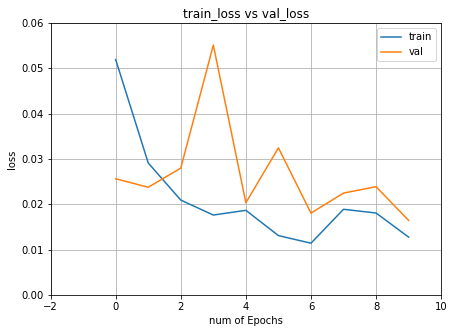

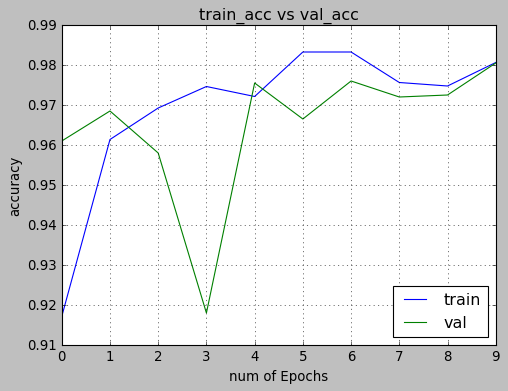

In [66]:
# Evaluate the model
score = model.evaluate(
    X_val_new,
    y_val_new,
    batch_size=batch_size
    )
print('**********************************************')
print('Test score:', score)

print('History', hist.history)

# Plot the results
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(10)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [95]:
from PIL import Image
img0 = Image.open('0.jpg')
img1 = Image.open('1.jpg')
img2 = Image.open('2.jpg')
img3 = Image.open('3.jpg')
img4 = Image.open('4.jpg')
img5 = Image.open('5.jpg')
img6 = Image.open('6.jpg')
img7 = Image.open('7.jpg')
img8 = Image.open('8.jpg')
img9 = Image.open('9.jpg')

In [96]:
# Loading the best saved model to make predictions

import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

In [97]:
char_list = os.listdir('DATASET3/')


print(char_list)

['51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [102]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
    for img in images:
        img = image.load_img(img, target_size=(299, 299))
        img = image.img_to_array(img)                    
        img = np.expand_dims(img, axis=0)         
        img /= 255.                                      

        pred = model.predict(img)
        index = np.argmax(pred)
        char_list.sort()
        pred_value = char_list[index]
        if show:
            plt.imshow(img[0])                           
            plt.axis('off')
            plt.title(pred_value)
            plt.show()

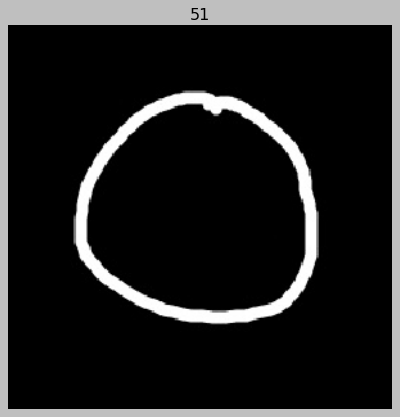

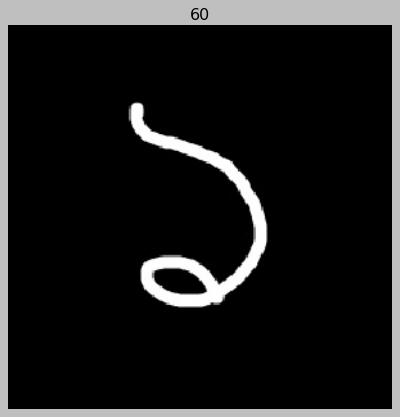

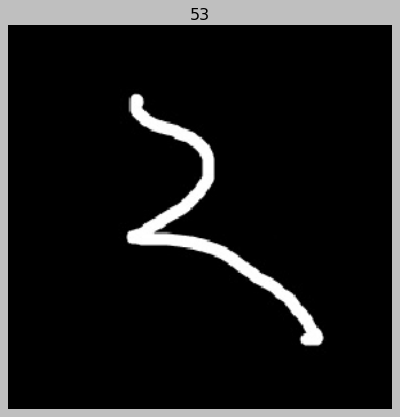

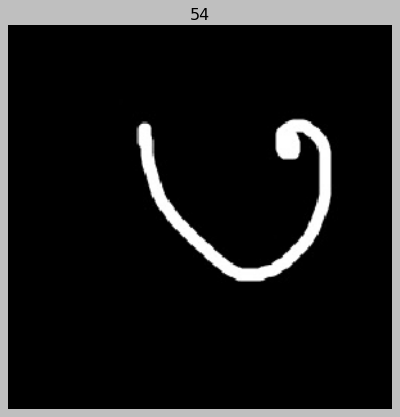

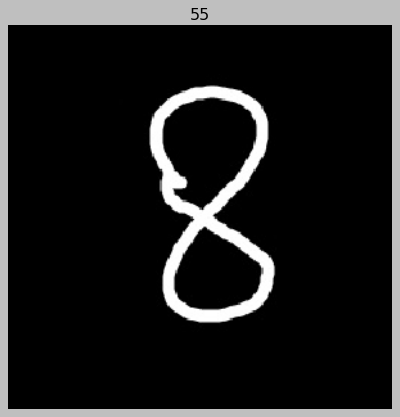

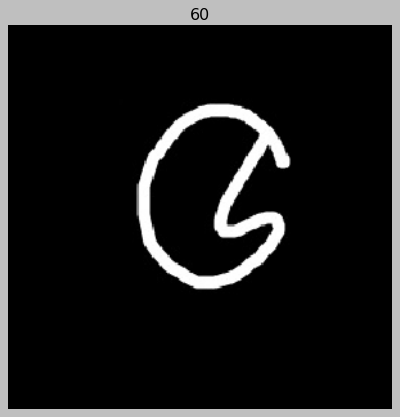

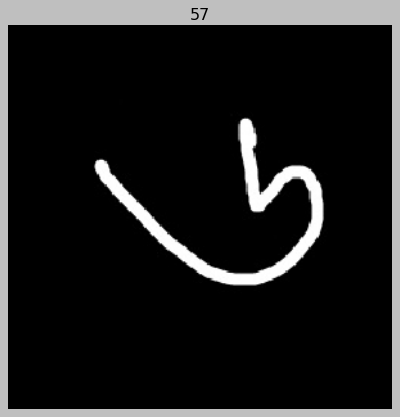

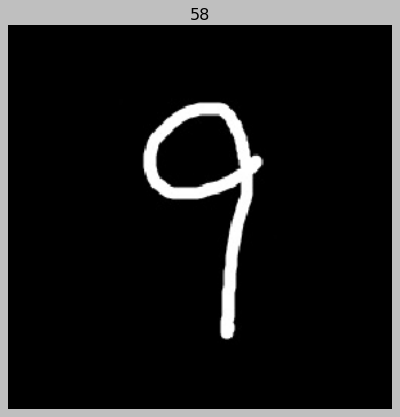

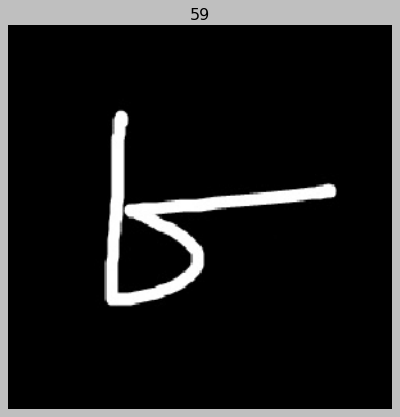

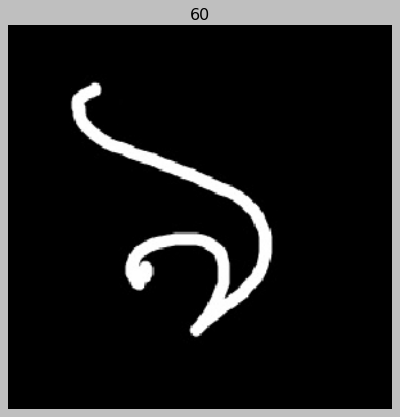

In [103]:
predict_class(model_best, images, True)

In [101]:
print(len(images))

10


In [104]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)   

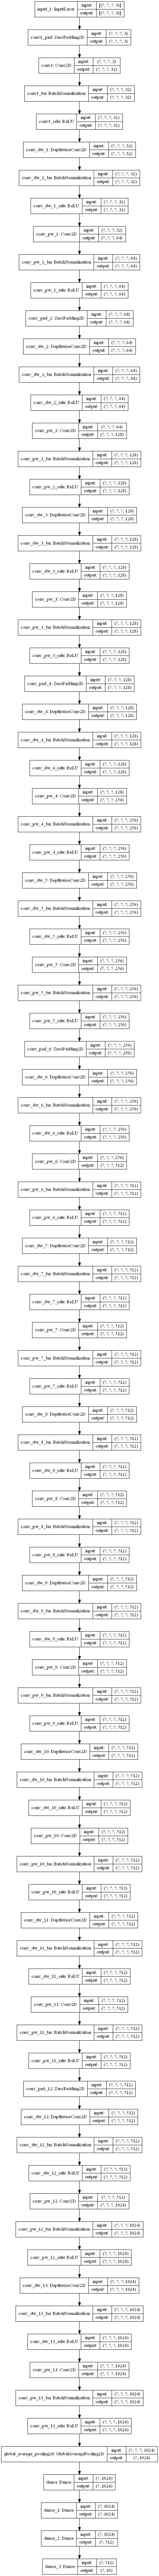

In [112]:
# example of a convolutional neural network
from keras.utils import plot_model
from keras.models import Model



from IPython.display import Image 

plot_model(
    model,
    to_file="model.png",
    show_shapes=True,

    show_layer_names=True,
    rankdir="TB",

    dpi=100,
)